# Objectif

L'objectif de ce mini-projet consiste à concevoir un **Réseau de Neurones Multi-Couches** afin de développer un modèle de classification atteignant une précision élevée dans le contexte d'un problème non linéairement séparable. Atteindre une précision élevée n'est pas toujours trivial et dépend fortement de la nature du jeu de données.

En supposant que le jeu de données est bien préparé, la précision du modèle demeure sensible à plusieurs paramètres clés :
- L'initialisation des poids du modèle avant l'entraînement.
- Le choix du taux d'apprentissage (learning rate).
- Le choix de l'optimiseur (Batch Gradient Descent, mini-batch GD, SGD, Adam).
- La méthode de mise à jour des poids : les éléments à considérer englobent le gradient, le taux d'apprentissage, etc.

En résumé, l'objectif est d'explorer de manière approfondie comment la précision (ou toute autre métrique pertinente) évolue au fil des itérations et comment garantir une performance élevée du modèle.

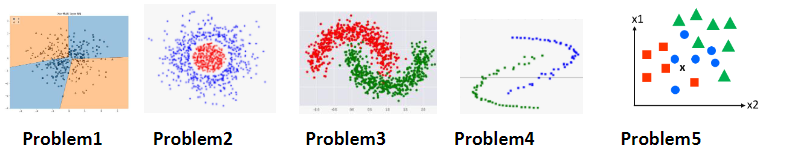


## Mise en situation : non linear learning , concepts de base

1. Un problème non linéairement séparable est un problème de classification où il n’existe pas de ligne droite , de plan , ou d’hyperplan qui peut séparer parfaitement les différentes classes de données.

2. Un perceptron, qui est un réseau de neurones à une seule couche, ne peut traiter que des problèmes linéairement séparables. C’est-à-dire qu’il peut seulement résoudre un problème linéairement séparable Pour les problèmes non linéairement séparables, comme une fonction XOR ou des classes en spirale, un réseau de neurones à plusieurs couches est nécessaire. Ce dernier peut apprendre des frontières de décision plus complexes grâce à des fonctions d’activation non linéaires, lui permettant ainsi de gérer des situations plus complexes.

3. Pour résoudre un problème non linéairement séparable avec un réseau de neurones, choisissez une architecture à plusieurs couches, initialisez les poids avec une méthode comme Xavier, ajustez le taux d’apprentissage pour éviter un apprentissage trop lent ou trop rapide, et utilisez un optimiseur efficace comme Adam.

In [1]:
## Set up the libraries

import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import  Adam, SGD
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_decision_regions
from sklearn.svm import SVC


print("Set up Completed !")

Set up Completed !


## Etape 1 : XOR | Problem 1 :

1. Création du Data Set

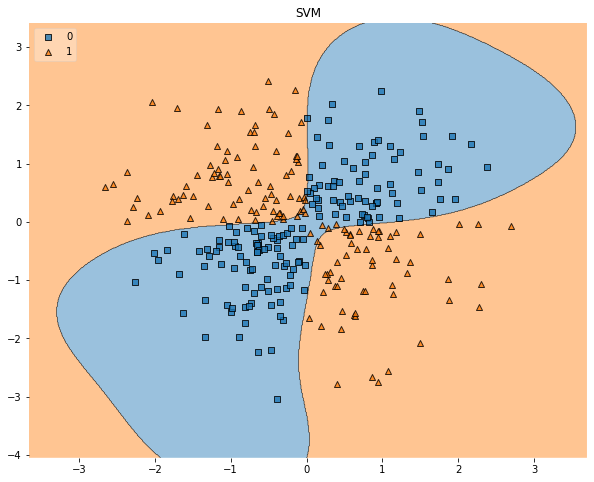

In [3]:
rng = np.random.RandomState(0)
X = rng.randn(300, 2)
y = np.array(np.logical_xor(X[:, 0] > 0, X[:, 1] > 0),
dtype=int)
svm_model = SVC(gamma='auto')
svm_model.fit(X, y)
fig = plt.figure(figsize=(10,8))
fig = plot_decision_regions(X=X, y=y, clf=svm_model, legend=2)
plt.title("SVM")
plt.show()

Voici la représentation mathématique de l'opération XOR entre $x_1$ et $x_2$ utilisant les balises LaTeX entre :

$$y_i =
\begin{cases}
1, & \text{si } (x_{i1} > 0 \text{ et } x_{i2} \leq 0) \text{ ou } (x_{i1} \leq 0 \text{ et } x_{i2} > 0) \\
0, & \text{sinon}
\end{cases}$$

Cette notation reflète l'opération XOR logique entre les caractéristiques $x_1$ et $x_2$ dans votre ensemble de données.

<hr>

2. Split data:X_train, X_test, y_train,y_test

Divisant le dataset en 70% training set et 30% testing set

In [4]:
#Splitting of the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

<hr>

3. Création d' un réseau de neurones en utilisant keras-tensorflow 

Utilisant l'optimiser adam

In [5]:
# Afficher les graphiques d'accuracy et de loss

def viz(accuracy, loss):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(accuracy, label='Accuracy')
    plt.title('Training Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(loss, label='Loss', color='r')
    plt.title('Training Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

In [6]:
#Model
#Xavier comme une approche d'initialisation
model1 = Sequential([
    Dense(2, input_dim=2,activation='relu', kernel_initializer='glorot_uniform'),
    Dense(1, activation='sigmoid')
])

In [7]:
#Compilation of the model
model1.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

100%|██████████| 100/100 [00:16<00:00,  6.18it/s]


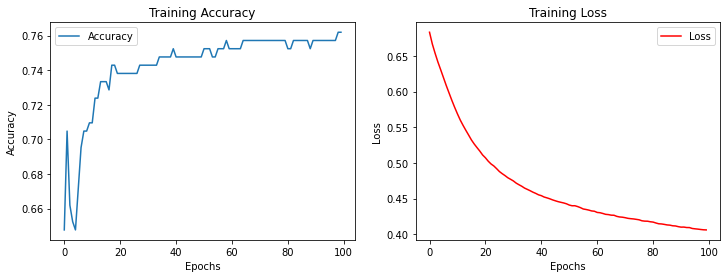

In [8]:
# Créer des listes pour stocker l'accuracy et le loss
accuracy = []
loss = []
epochs = 100


# Boucle d'apprentissage avec tqdm
for epoch in tqdm(range(epochs)):
    history = model1.fit(X_train, y_train, epochs=1, verbose=0)
    accuracy.append(history.history['accuracy'][0])
    loss.append(history.history['loss'][0])

viz(accuracy,loss)

In [9]:
#Tester le model
loss, accuracy = model1.evaluate(X_test, y_test)
print(f'Our Accuracy equal a :{accuracy}')

3/3 [==============================] - 0s 7ms/step - loss: 0.4693 - accuracy: 0.7222
Our Accuracy equal a :0.7222222089767456


In [10]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2)                 6         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 3         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


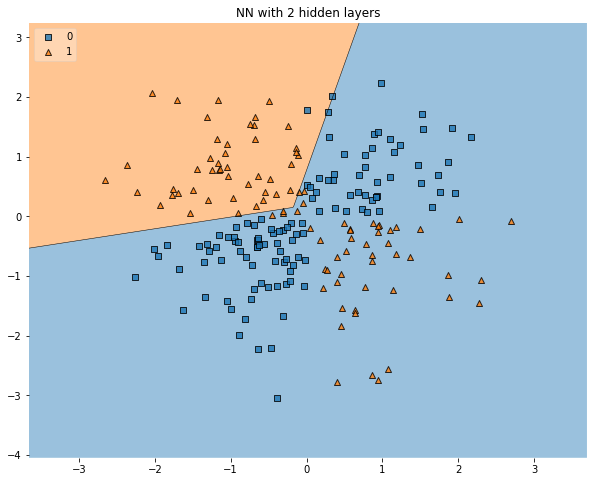

In [11]:
#NN with 2 hidden layers
fig = plt.figure(figsize=(10,8))
fig = plot_decision_regions(X=X_train, y=y_train, clf=model1, legend=2)
plt.title("NN with 2 hidden layers")
plt.show()

In [12]:
model1.save("01-model_Adam_100.h5")

Utilisant l'optimiser SGD

In [13]:
#Model
#Xavier comme une approche d'initialisation
model2 = Sequential([
    Dense(2, input_dim=2,activation='relu', kernel_initializer='glorot_uniform'),
    Dense(1, activation='sigmoid')
])

In [14]:
#Compilation of the model
model2.compile(optimizer=SGD(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

100%|██████████| 100/100 [00:16<00:00,  6.01it/s]


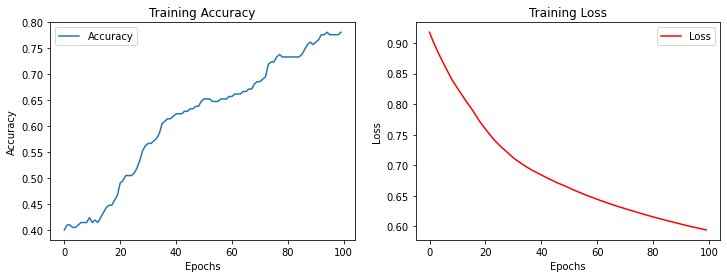

In [15]:
# Créer des listes pour stocker l'accuracy et le loss
accuracy = []
loss = []
epochs = 100


# Boucle d'apprentissage avec tqdm
for epoch in tqdm(range(epochs)):
    history = model2.fit(X_train, y_train, epochs=1, verbose=0)
    accuracy.append(history.history['accuracy'][0])
    loss.append(history.history['loss'][0])

viz(accuracy,loss)

In [1]:
model2.save("02-model_SGD_100.h5")

NameError: name 'model2' is not defined

<hr>

4. Amélioration de la performance du modèle

In [20]:
# Accéder aux couches du modèle

layers1 = model1.layers
layers2 = model2.layers

In [21]:
# Parcourir les couches et afficher les poids
for layer in layers1:
    weights = layer.get_weights()
    if weights:
        print("Layer Name:", layer.name)
        print("Weights:", weights)

Layer Name: dense
Weights: [array([[-2.0835683 , -3.3837605 ],
       [-0.65367025,  0.9497306 ]], dtype=float32), array([-0.26575917, -0.6807811 ], dtype=float32)]
Layer Name: dense_1
Weights: [array([[-3.604286 ],
       [ 2.4932382]], dtype=float32), array([-0.13176629], dtype=float32)]


In [22]:
# Parcourir les couches et afficher les poids
for layer in layers2:
    weights = layer.get_weights()
    if weights:
        print("Layer Name:", layer.name)
        print("Weights:", weights)

Layer Name: dense_2
Weights: [array([[-0.50321025,  0.92195946],
       [ 0.48559588, -0.7472559 ]], dtype=float32), array([-0.15996692,  0.00089508], dtype=float32)]
Layer Name: dense_3
Weights: [array([[1.3301495 ],
       [0.23752603]], dtype=float32), array([-0.33767894], dtype=float32)]


3. Nous remarquant que des poids sont entrain de trop se minimisé dans la 2ème couche donc le vanishing gradiant dans SGL en l'occurence qui a eu lieu

Pour atténuer le problème du "vanishing gradient", voici quelques techniques que vous pouvez utiliser :
- **Initialisation des poids appropriée :** Utiliser des initialisations de poids appropriées telles que "Xavier" ou "He" peut aider à atténuer le problème du "vanishing gradient" en s'assurant que les poids sont initialement à une échelle appropriée.
- **Utilisation de fonctions d'activation appropriées :** Certaines fonctions d'activation, comme la fonction ReLU, sont moins susceptibles de causer un "vanishing gradient" par rapport à d'autres fonctions comme la tangente hyperbolique.
- **Utilisation de techniques de régularisation :** Des techniques comme la régularisation L1/L2 ou le dropout peuvent aider à réduire le risque de "vanishing gradient" en rendant le modèle plus robuste.


4. J'ai opté pour SGD car il est plus simple à adapter aux ensembles de données de petite taille. Il est rapide et fluctue davantage, ce qui le rend plus rapide que d'autres optimiseurs plus complexes tels qu'Adam. De plus, cette fluctuation accrue peut aider à éviter de rester piégé dans des minima locaux.

5. oui , Learning Rate controle la vitesse de convergence , on le regle avec des algorithme comme Kfold CV Pour des jeux de données de grande taille 

<img src="KfoldCV.gif">

ou bien LOOCV pour celle de petite tailles 

<img src="LOOCV.gif">

6. Le nombre d'epochs est le nombre d'occurence d'ajustement du model 